<h1> 4. Metode odabira značajki </h1>

U ovoj datoteci probat ćemo dobiti bolji uvid u važnosti značajki pripremljenog skupa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## BRISE UPOZORENJA
import warnings
warnings.filterwarnings('ignore')

In [3]:
## UČITAVANJE TRAIN I TEST SKUPA

X_train = pd.read_hdf('X_train.h5' , key = 'X_train')
X_test = pd.read_hdf('X_test.h5', key = 'X_test')
y_train = X_train['PRIJEVREMENI_RASKID'].ravel()
X_train.drop(['PRIJEVREMENI_RASKID'], axis = 1, inplace = True)

## to je normalizirani skup, spreman za treniranje

<h3> Univarijatni odabir </h3>

Makroekonomski indikatori su znacajke koje pocinju sa 'ind'. Imena tih značajki su izmijenjena u bilježnici "data_preparation". 
Prava imena su:
1. ind1-poc = GDP per capita (in EUR) 
2. ind2-poc = GDP - year-on-year rate of growth (in %, constant prices) 
3. ind3-poc = Average CPI year-on-year inflation rate 
4. ind4-poc = Current account balance (as of % GDP) 
5. ind5-poc = Exports of goods and services (as of % GDP)
6. ind6-poc = Imports of goods and services (as of % GDP) 
7. ind7-poc = External debt (as of % GDP) 
8. ind8-poc = Average exchange rate (HRK : 1 EUR)
9. ind9-poc = Average exchange rate (HRK : 1 USD)
10. ind10-poc = Consolidated general government net lending (+)/borrowing (-) (as % of GDP)
11. ind11-poc = General government debt (as % of GDP)
12. ind12-poc = Employment rate (ILO, persons above 15 years of age)

[0.12967648 0.19580251 0.11041241 0.12979208 0.13570473 0.12994397
 0.00182418 0.00434622 0.009258   0.00076731 0.0053557  0.00123089
 0.00320894 0.00229524 0.00391832 0.00198568 0.0031719  0.00807825
 0.01827374 0.0252119  0.01426122 0.03881599 0.0075959  0.01906842]


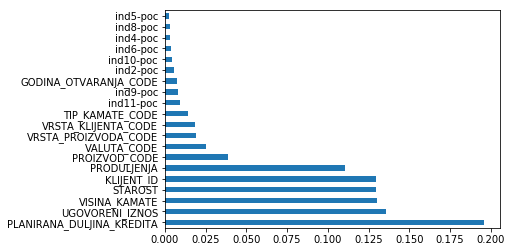

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X_train
y = y_train  #target column i.e price range


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.13071758 0.19342469 0.10632094 0.13018227 0.13653939 0.13031394
 0.00392521 0.00205389 0.00860651 0.00266885 0.00196074 0.00367584
 0.0030064  0.00216057 0.00576304 0.00539465 0.00299326 0.01092387
 0.01642116 0.02908517 0.01329309 0.0359522  0.00545679 0.01915993]


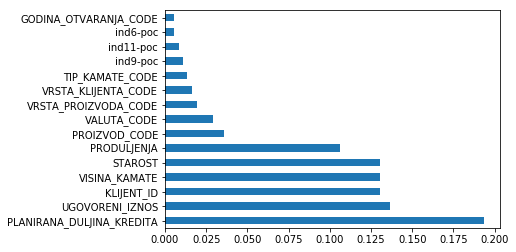

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X_train
y = y_train  #target column i.e price range


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
!pip install xgboost

[0.00878827 0.06956692 0.13550061 0.         0.02947311 0.
 0.02417967 0.0102254  0.01019286 0.00307027 0.09290795 0.
 0.27587613 0.01233572 0.03819913 0.00951669 0.00567503 0.01161944
 0.00736804 0.01564481 0.03265473 0.05789725 0.10198765 0.04732031]


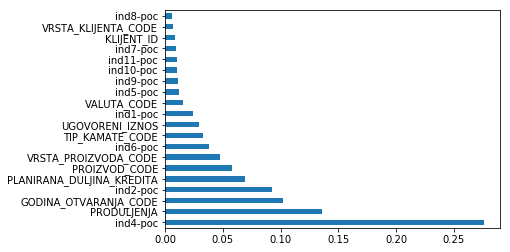

In [9]:
import xgboost as xgb

X = X_train
y = y_train  #target column i.e price range

import matplotlib.pyplot as plt
model = xgb.XGBClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [10]:
features3 = ['ind4-poc', 'PRODULJENJA', 'GODINA_OTVARANJA_CODE', 'ind2-poc', 'PLANIRANA_DULJINA_UGOVORA', 'PROIZVOD_CODE', 
            'VRSTA_PROIZVODA_CODE', 'ind6-poc', 'TIP_KAMATE_CODE', 'UGOVORENI_IZNOS', 'ind1-poc', 'VALUTA_CODE', 'in5-poc',
            'ind9-poc', 'ind10-poc', 'ind11-poc', 'ind7-poc', 'KLIJENT_ID', 'VRSTA_KLIJENTA_CODE', 'ind8-poc']

[0.00878827 0.06956692 0.13550061 0.         0.02947311 0.
 0.02417967 0.0102254  0.01019286 0.00307027 0.09290795 0.
 0.27587613 0.01233572 0.03819913 0.00951669 0.00567503 0.01161944
 0.00736804 0.01564481 0.03265473 0.05789725 0.10198765 0.04732031]


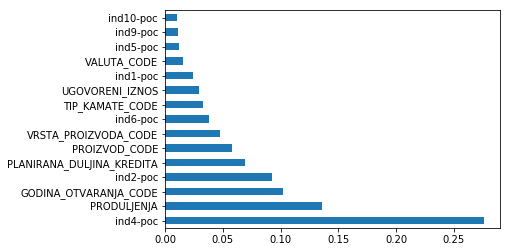

In [11]:
import xgboost as xgb

X = X_train
y = y_train  #target column i.e price range

import matplotlib.pyplot as plt
model = xgb.XGBClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [12]:
ft_num = X_train.shape[1]
print('Broj značajki u originalnom skupu:', ft_num)

Broj značajki u originalnom skupu: 24


In [13]:
X.columns

Index(['KLIJENT_ID', 'PLANIRANA_DULJINA_KREDITA', 'PRODULJENJA', 'STAROST',
       'UGOVORENI_IZNOS', 'VISINA_KAMATE', 'ind1-poc', 'ind10-poc',
       'ind11-poc', 'ind12-poc', 'ind2-poc', 'ind3-poc', 'ind4-poc',
       'ind5-poc', 'ind6-poc', 'ind7-poc', 'ind8-poc', 'ind9-poc',
       'VRSTA_KLIJENTA_CODE', 'VALUTA_CODE', 'TIP_KAMATE_CODE',
       'PROIZVOD_CODE', 'GODINA_OTVARANJA_CODE', 'VRSTA_PROIZVODA_CODE'],
      dtype='object')

Odabrane su četiri različite varijante odabira značajki na kojima ćemo trenirati model pomoću gore navedenih metoda.

In [30]:
features1 = ['PLANIRANA_DULJINA_UGOVORA', 'UGOVORENI_IZNOS', 'KLIJENT_ID', 'VISINA_KAMATE', 'STAROST', 'PRODULJENJA', 
             'PROIZVOD_CODE', 'VALUTA_CODE', 'VRSTA_KLIJENTA_CODE', 'VRSTA_PROIZVODA_CODE', 'TIP_KAMATE_CODE',
             'ind11-poc', 'ind10-poc', 'ind9-poc', 'ind4-poc', 'GODINA_OTVARANJA_CODE', 'ind1-poc', 'ind2-poc',
             'ind7-poc', 'ind8-poc']

features2 = ['PLANIRANA_DULJINA_UGOVORA', 'UGOVORENI_IZNOS', 'KLIJENT_ID', 'VISINA_KAMATE', 'STAROST', 'PRODULJENJA', 
             'PROIZVOD_CODE', 'VALUTA_CODE', 'VRSTA_KLIJENTA_CODE', 'VRSTA_PROIZVODA_CODE', 'TIP_KAMATE_CODE',
             'ind11-poc', 'ind5-poc', 'ind4-poc', 'GODINA_OTVARANJA_CODE']

features3 = ['ind4-poc', 'PRODULJENJA', 'GODINA_OTVARANJA_CODE', 'ind2-poc', 'PLANIRANA_DULJINA_UGOVORA', 'PROIZVOD_CODE', 
            'VRSTA_PROIZVODA_CODE', 'ind6-poc', 'TIP_KAMATE_CODE', 'UGOVORENI_IZNOS', 'ind1-poc', 'VALUTA_CODE', 'ind5-poc',
            'ind9-poc', 'ind10-poc', 'ind11-poc', 'ind7-poc', 'KLIJENT_ID', 'VRSTA_KLIJENTA_CODE', 'ind8-poc']

features4 = ['ind4-poc', 'PRODULJENJA', 'GODINA_OTVARANJA_CODE', 'ind2-poc', 'PLANIRANA_DULJINA_UGOVORA', 'PROIZVOD_CODE', 
            'VRSTA_PROIZVODA_CODE', 'ind6-poc', 'TIP_KAMATE_CODE', 'UGOVORENI_IZNOS', 'ind1-poc', 'VALUTA_CODE', 'ind5-poc',
            'ind9-poc', 'ind10-poc']

In [15]:
xfeatures1 = ['ind2-poc', 'PROIZVOD_CODE', 'GODINA_OTVARANJA_CODE', 'ind4-poc', 'ind11-poc', 'ind9-poc', 
             'PLANIRANA_DULJINA_UGOVORA', 'VRSTA_PROIZVODA_CODE', 'ind1-poc', 'TIP_KAMATE_CODE', 'UGOVORENI_IZNOS',
             'VALUTA_CODE', 'PRODULJENJA', 'ind10-poc', 'KLIJENT_ID', 'ind12-poc', 'ind8-poc', 'ind6-poc', 
             'VRSTA_KLIJENTA_CODE', 'STAROST']

xfeatures2 = ['PLANIRANA_DULJINA_UGOVORA', 'PRODULJENJA', 'VISINA_KAMATE', 'STAROST',
       'KLIJENT_ID', 'UGOVORENI_IZNOS', 'VALUTA_CODE', 'PROIZVOD_CODE',
       'VRSTA_PROIZVODA_CODE', 'VRSTA_KLIJENTA_CODE', 'TIP_KAMATE_CODE',
       'ind8-poc', 'ind3-poc', 'ind4-poc']

xfeatures3 = ['GODINA_OTVARANJA_CODE', 'PROIZVOD_CODE', 'ind4-poc', 'ind2-poc', 'ind11-poc', 'PLANIRANA_DULJINA_UGOVORA',
            'ind1-poc', 'TIP_KAMATE_CODE', 'VRSTA_PROIZVODA_CODE', 'PRODULJENJA', 'UGOVORENI_IZNOS', 'ind5-poc', 'ind9-poc',
            'ind10-poc', 'ind3-poc', 'KLIJENT_ID', 'VALUTA_CODE', 'ind7-poc', 'VRSTA_KLIJENTA_CODE']

<h3> Korelacija značajki </h3>

U ovom dijelu promatramo kako su značajke koreliranje s ciljnom značajkom.

In [16]:
X = X_train.copy()
X['PRIJEVREMENI_RASKID'] = y_train

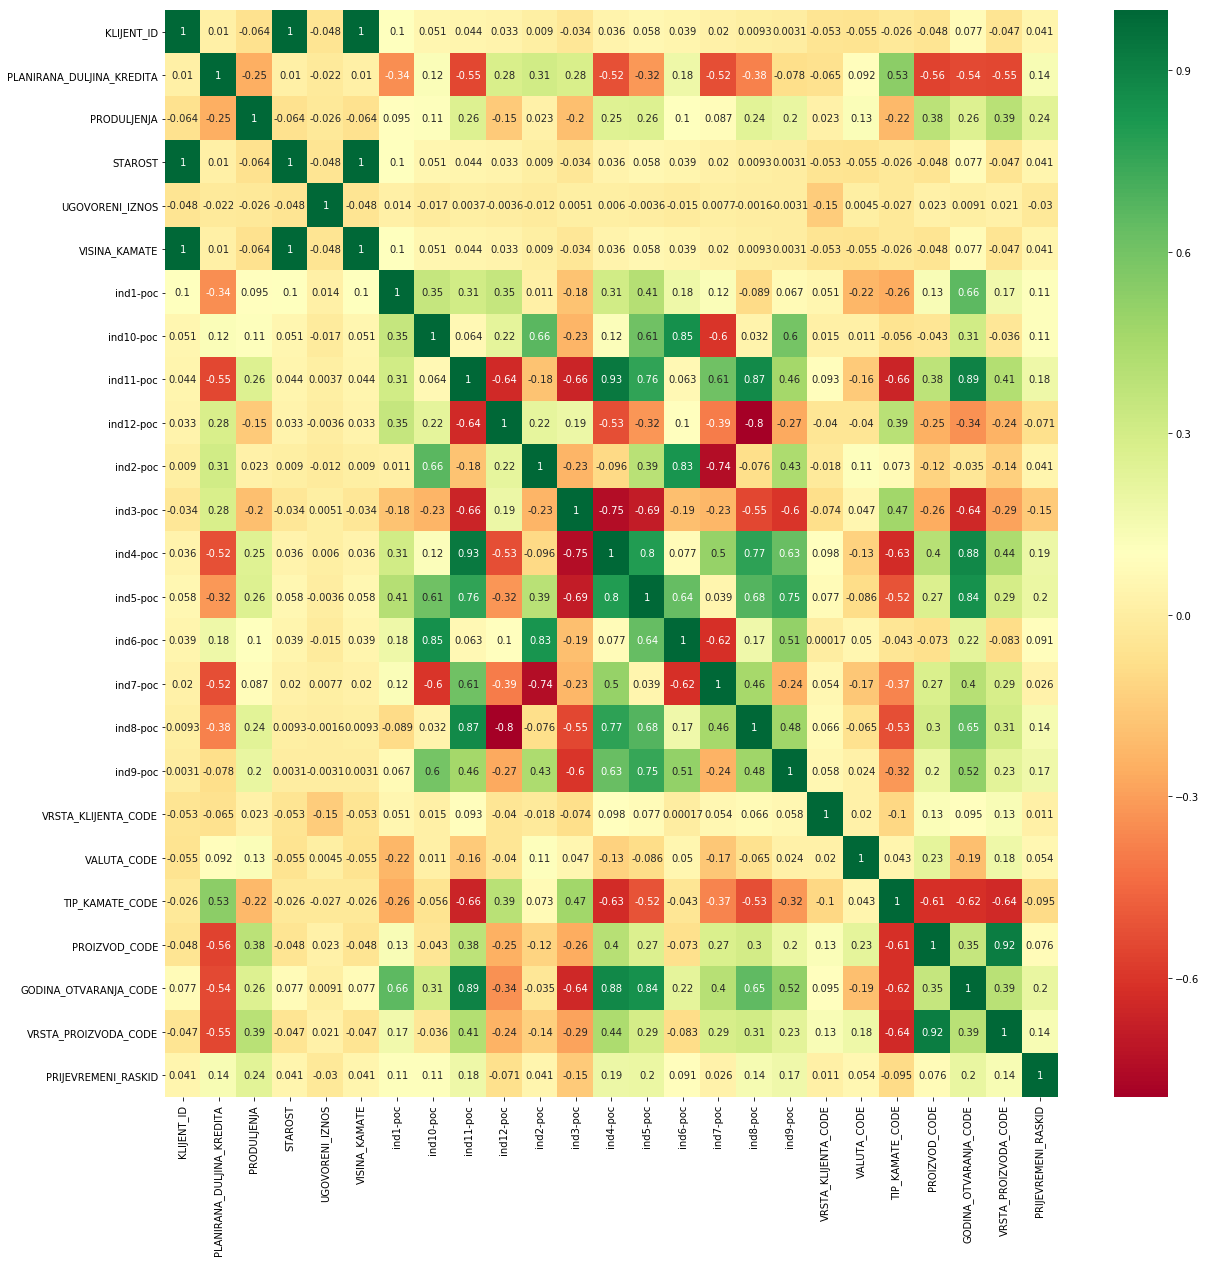

In [17]:
import seaborn as sns
#get correlations of each features in dataset
data = X
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<h3> Ispis skupa za učenje i testiranje s odabranim značajkama </h3>

In [31]:
X_train_out1 = X_train[features1]
X_test_out1 = X_test[features1]

X_train_out2 = X_train[features2]
X_test_out2 = X_test[features2]

X_train_out3 = X_train[features3]
X_test_out3 = X_test[features3]

X_train_out4 = X_train[features4]
X_test_out4 = X_test[features4]

X_train_out1['PRIJEVREMENI_RASKID'] = y_train
X_train_out2['PRIJEVREMENI_RASKID'] = y_train
X_train_out3['PRIJEVREMENI_RASKID'] = y_train
X_train_out4['PRIJEVREMENI_RASKID'] = y_train

In [32]:
X_train_out1.to_hdf('X_train_ft1.h5', key= 'X_train_ft1')
X_train_out2.to_hdf('X_train_ft2.h5', key= 'X_train_ft2')
X_train_out3.to_hdf('X_train_ft3.h5', key= 'X_train_ft3')
X_train_out4.to_hdf('X_train_ft4.h5', key= 'X_train_ft4')

In [33]:
X_test_out1.to_hdf('X_test_ft1.h5', key= 'X_test_ft1')
X_test_out2.to_hdf('X_test_ft2.h5', key= 'X_test_ft2')
X_test_out3.to_hdf('X_test_ft3.h5', key= 'X_test_ft3')
X_test_out4.to_hdf('X_test_ft4.h5', key= 'X_test_ft4')